In [81]:
import os
import ipyvolume as ipv
from matplotlib import cm
from colorama import Fore
from scipy.interpolate import interp2d
import ipywidgets as widgets
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from pylab import rcParams

In [91]:
data_dir = os.path.join('../data')
data_files = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir)]
data_files

['../data/resnet18_l0l1_WNoneA6.pkl',
 '../data/resnet18_l0l1_WNoneA5.pkl',
 '../data/resnet18_l0l1_WNoneA2.pkl',
 '../data/results',
 '../data/resnet18_l0l1_WNoneA4.pkl',
 '../data/resnet18_l0l1_WNoneA7.pkl',
 '../data/resnet18_l0l1_WNoneA8.pkl',
 '../data/resnet18_l0l-1_WNoneA2.pkl',
 '../data/resnet18_l0l1_W3ANone.pkl',
 '../data/resnet18_l0l-1_W3ANone.pkl',
 '../data/resnet18_l0l1_WNoneA3.pkl']

In [107]:
print("X std {}".format(X.std()))
print("Y std {}".format(Y.std()))

X std 1.6601717402901794
Y std 7.485667223931755


In [112]:
pkl1 = pickle.load(open('../data/resnet18_l0l-1_WNoneA2.pkl', 'rb'))
print(pkl1.keys())
X = pkl1['X']
Y = pkl1['Y']
Z = pkl1['Z']
max_point = pkl1['max_point']
l1_point = pkl1['l1_point']
l1_5_point = pkl1['l1.5_point']
l2_point = pkl1['l2_point']
l2_5_point = pkl1['l2.5_point']
l3_point = pkl1['l3_point']

def ipv_point(p, color='red'):
    x1, x2, x3 = np.array([p[0]]), np.array([p[1]]), np.array([p[2]])
    ipv.scatter(x1, x2, x3, size=3., color=color, marker='sphere')

# f = interp2d(X, Y, Z, kind='linear')
# x_intr = np.linspace(0.5, max_point[0].item(), 300)
# y_intr = np.linspace(0.5, max_point[1].item(), 300)
# Zintr = f(x_intr, y_intr)
# Xintr, Yintr = np.meshgrid(x_intr, y_intr)

fig = ipv.figure()
colormap = cm.spectral
znorm = Z - Z.min()
znorm /= znorm.ptp()
znorm.min(), znorm.max()
color = colormap(znorm)
mesh = ipv.plot_surface(X/X.std(), Y/Y.std(), Z, color=color[...,:3])

# ipv_point(np.array([l1_point[0], l1_point[1], l1_point[2]]), color='white')
# ipv_point(np.array([l1_5_point[0], l1_5_point[1], l1_5_point[2]]), color='yellow')
# ipv_point(np.array([l2_point[0], l2_point[1], l2_point[2]]), color='red')
# ipv_point(np.array([l2_5_point[0], l2_5_point[1], l2_5_point[2]]), color='blue')
# ipv_point(np.array([l3_point[0], l3_point[1], l2_point[2]]), color='green')

# ipv.style.use('minimal')
ipv.show()

# print(Fore.RED + "L2")
# print(Fore.GREEN + "L3")
# print(Fore.WHITE + "Laplace")

dict_keys(['l2_point', 'l1_point', 'l3_point', 'X', 'max_point', 'Y', 'l2.5_point', 'l1.5_point', 'Z'])


In [96]:
pos = (0.9880201454015884, -0.26571599043323907, 1.029754317952022)
fov = 46
far = 2000
focus = 10
up = (-0.7302349613388613, -0.09140399226241408, 0.6770540683261007)
mw = (0.05909315140258031,
     0.978845489767093,
     0.19588135853095265,
     0.0,
     -0.7302349613388613,
     -0.09140399226241414,
     0.6770540683261007,
     0.0,
     0.6806356592889792,
     -0.18304867484118106,
     0.7093858484232288,
     0.0,
     0.9880201454015884,
     -0.26571599043323907,
     1.029754317952022,
     1.0)
fig.camera.up = up
fig.camera.far = far
fig.camera.position = pos
fig.camera.fov = fov
fig.camera.setRotationFromMatrix(mw)

In [238]:
def plot_p(ax, p, c='r'):
    ax.scatter([p[0]], [p[1]], color=c, s=50);

def create_heatmap(data_path, xmin, ymin, figname=None):
    pkl = pickle.load(open(data_path, 'rb'))
    X = pkl['X']
    Y = pkl['Y']
    Z = pkl['Z']
    max_point = pkl['max_point']
    l2_point = pkl['l2_point']
    l3_point = pkl['l3_point']
    laplace_point = pkl['laplace_point']

    f = interp2d(X, Y, Z, kind='linear')
    intr_size = 200
    x_intr = np.linspace(xmin, max_point[0].item(), intr_size)
    y_intr = np.linspace(ymin, max_point[1].item(), intr_size)
    Zintr = f(x_intr, y_intr)
    Xintr, Yintr = np.meshgrid(x_intr, y_intr)

    x = Xintr
    y = Yintr
    z = Zintr

    fig, ax = plt.subplots()

    c = ax.pcolormesh(x, y, z, cmap=cm.spectral)
    cbar = fig.colorbar(c, ax=ax)
    cbar.ax.tick_params(labelsize=12) 

    plot_p(ax, [l2_point[0], l2_point[1]], 'r')
    plot_p(ax, [l3_point[0], l3_point[1]], 'g')
    plot_p(ax, [laplace_point[0], laplace_point[1]], 'y')

    plt.legend(['L2 - {:.3f}'.format(l2_point[2]), 'L3 - {:.3f}'.format(l3_point[2]), 'Laplace - {:.3f}'.format(laplace_point[2])],
              loc='upper center', ncol=3, fancybox=True, bbox_to_anchor=(0.5, 1.1), fontsize=12)
    plt.tick_params(labelsize=12)
    if figname is not None:
        plt.savefig(figname)

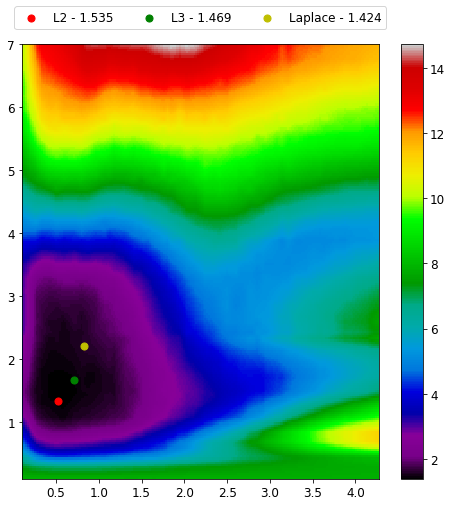

In [240]:
rcParams['figure.figsize'] = 8, 8
create_heatmap('../data/resnet18_l0l1_WNoneA2.pkl', 0.1, 0.1, '../fig/resnet18_l0l1_WNoneA2.png')

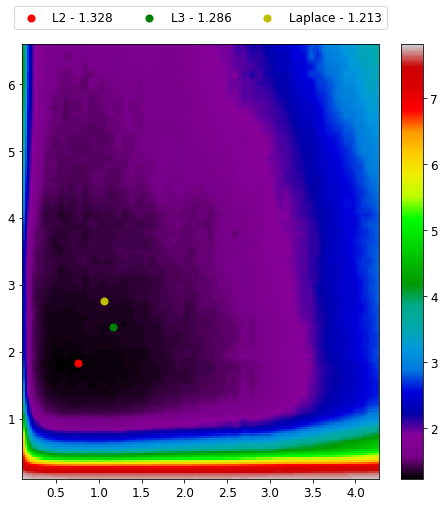

In [241]:
rcParams['figure.figsize'] = 8, 8
create_heatmap('../data/resnet18_l0l1_WNoneA3.pkl', 0.1, 0.1, '../fig/resnet18_l0l1_WNoneA3.png')

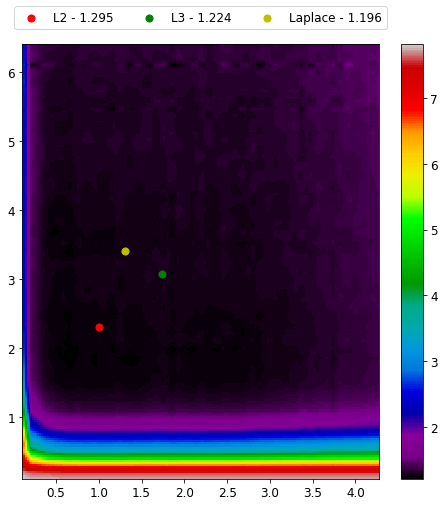

In [242]:
rcParams['figure.figsize'] = 8, 8
create_heatmap('../data/resnet18_l0l1_WNoneA4.pkl', 0.1, 0.1, '../fig/resnet18_l0l1_WNoneA4.png')

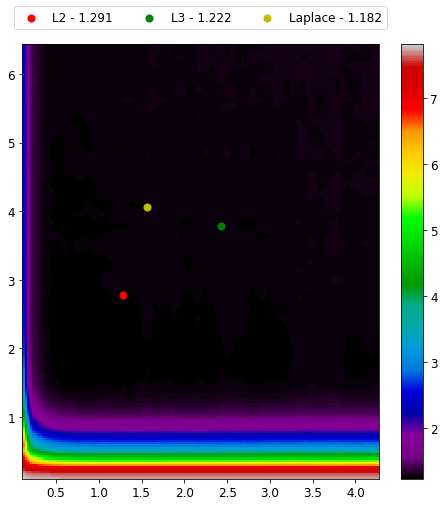

In [243]:
rcParams['figure.figsize'] = 8, 8
create_heatmap('../data/resnet18_l0l1_WNoneA5.pkl', 0.1, 0.1, '../fig/resnet18_l0l1_WNoneA5.png')

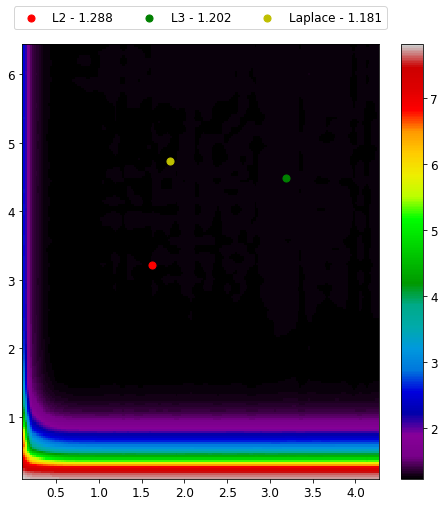

In [244]:
rcParams['figure.figsize'] = 8, 8
create_heatmap('../data/resnet18_l0l1_WNoneA6.pkl', 0.1, 0.1, '../fig/resnet18_l0l1_WNoneA6.png')

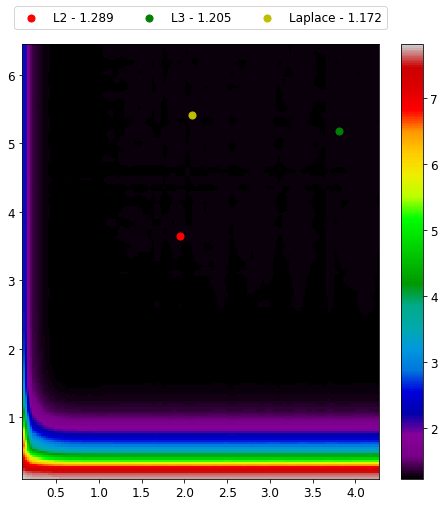

In [245]:
rcParams['figure.figsize'] = 8, 8
create_heatmap('../data/resnet18_l0l1_WNoneA7.pkl', 0.1, 0.1, '../fig/resnet18_l0l1_WNoneA7.png')

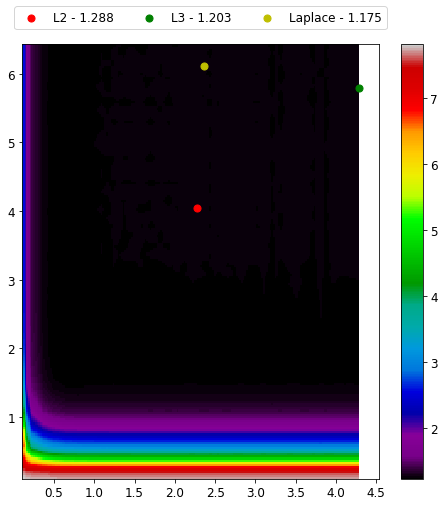

In [246]:
rcParams['figure.figsize'] = 8, 8
create_heatmap('../data/resnet18_l0l1_WNoneA8.pkl', 0.1, 0.1, '../fig/resnet18_l0l1_WNoneA8.png')